## Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you might choose one over the other.

### Ordinal Encoding vs. Label Encoding

**Ordinal Encoding** and **Label Encoding** are techniques used to convert categorical data into numerical data, which can be utilized by machine learning algorithms. Despite their similar goal, they differ in their application and the type of data they are best suited for.

#### **Label Encoding**
Label Encoding assigns a unique integer to each category in the categorical feature. It is suitable when the categorical values do not have an inherent order.

- **Example:**
  Suppose we have a feature `Color` with categories: `Red`, `Green`, `Blue`.

  | Color | Encoded |
  |-------|---------|
  | Red   | 0       |
  | Green | 1       |
  | Blue  | 2       |

Label Encoding does not imply any order; `Red` is not less or greater than `Green` or `Blue`.

- **When to use:**
  Use Label Encoding when there is no ordinal relationship among the categories, such as with colors, product IDs, or any nominal data.

#### **Ordinal Encoding**
Ordinal Encoding is used when the categorical values have an inherent order. Each category is assigned an integer that reflects this order.

- **Example:**
  Suppose we have a feature `Size` with categories: `Small`, `Medium`, `Large`.

  | Size   | Encoded |
  |--------|---------|
  | Small  | 1       |
  | Medium | 2       |
  | Large  | 3       |

Here, the encoding reflects the order: `Small < Medium < Large`.

- **When to use:**
  Use Ordinal Encoding when there is a natural ordering of categories, such as with sizes (small, medium, large), ratings (low, medium, high), or any ordinal data.

### Choosing Between Ordinal Encoding and Label Encoding

**Example Scenario:**

Suppose you are working on a machine learning model to predict house prices, and you have a feature called `Condition` that describes the condition of the house using categories: `Poor`, `Fair`, `Good`, `Excellent`.

- **Ordinal Encoding:**
  If you want to reflect the order in the conditions (i.e., `Poor < Fair < Good < Excellent`), you would use Ordinal Encoding.

  | Condition | Encoded |
  |-----------|---------|
  | Poor      | 1       |
  | Fair      | 2       |
  | Good      | 3       |
  | Excellent | 4       |

- **Label Encoding:**
  If the feature was instead something like `Neighborhood` with categories that have no intrinsic order such as `Downtown`, `Uptown`, `Suburban`, you would use Label Encoding.

  | Neighborhood | Encoded |
  |--------------|---------|
  | Downtown     | 0       |
  | Uptown       | 1       |
  | Suburban     | 2       |



## Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in a machine learning project.

### Target Guided Ordinal Encoding

**Target Guided Ordinal Encoding** is a technique where categorical variables are encoded based on the relationship between the category and the target variable. This method aims to capture the effect of each category on the target variable by creating a meaningful ordinal relationship.

#### How It Works

1. **Calculate Mean Target for Each Category:**
   For each category of the categorical variable, compute the mean of the target variable.

2. **Sort Categories by Mean Target:**
   Sort the categories based on their mean target value.

3. **Assign Ordinal Labels:**
   Assign ordinal labels to the categories based on the sorted order. Categories with a lower mean target get a lower ordinal label, and those with a higher mean target get a higher ordinal label.

#### Example

Let's consider a machine learning project predicting house prices (`Price`) based on various features, including a categorical feature `Neighborhood`.

**Step-by-Step Process:**

1. **Calculate Mean Price for Each Neighborhood:**

   | Neighborhood | Mean Price |
   |--------------|------------|
   | Downtown     | 300,000    |
   | Uptown       | 250,000    |
   | Suburban     | 200,000    |

2. **Sort Neighborhoods by Mean Price:**

   | Neighborhood | Mean Price |
   |--------------|------------|
   | Suburban     | 200,000    |
   | Uptown       | 250,000    |
   | Downtown     | 300,000    |

3. **Assign Ordinal Labels:**

   | Neighborhood | Encoded |
   |--------------|---------|
   | Suburban     | 1       |
   | Uptown       | 2       |
   | Downtown     | 3       |

#### When to Use Target Guided Ordinal Encoding

- **Feature Importance:** When you believe the categorical feature has a significant impact on the target variable and want to capture this effect in a meaningful way.
- **Improving Model Performance:** When traditional encoding methods (e.g., Label Encoding, One-Hot Encoding) do not adequately capture the relationship between the categorical feature and the target variable, leading to suboptimal model performance.
- **Reducing Dimensionality:** When dealing with high cardinality categorical features, Target Guided Ordinal Encoding can reduce dimensionality compared to One-Hot Encoding.

**Example Use Case:**

Suppose you are building a model to predict customer churn in a subscription service. You have a categorical feature `Customer Service Calls` with categories indicating the number of calls made by the customer (`0`, `1-2`, `3-4`, `5+`). If you observe that the mean churn rate varies significantly with the number of calls, you can use Target Guided Ordinal Encoding to encode this feature based on the mean churn rate for each category.

**Process:**

1. **Calculate Mean Churn Rate for Each Category:**

   | Customer Service Calls | Mean Churn Rate |
   |------------------------|-----------------|
   | 0                      | 0.10            |
   | 1-2                    | 0.15            |
   | 3-4                    | 0.25            |
   | 5+                     | 0.40            |

2. **Sort Categories by Mean Churn Rate:**

   | Customer Service Calls | Mean Churn Rate |
   |------------------------|-----------------|
   | 0                      | 0.10            |
   | 1-2                    | 0.15            |
   | 3-4                    | 0.25            |
   | 5+                     | 0.40            |

3. **Assign Ordinal Labels:**

   | Customer Service Calls | Encoded |
   |------------------------|---------|
   | 0                      | 1       |
   | 1-2                    | 2       |
   | 3-4                    | 3       |
   | 5+                     | 4       |

By encoding the `Customer Service Calls` feature in this way, the model can more effectively utilize the relationship between the number of calls and the likelihood of churn.


In [1]:
#For Example

import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

df.head()

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180


In [2]:
data=df.groupby('city')['price'].mean().to_dict()

In [3]:
df['city']=df['city'].map(data)

In [4]:
df

,city,price
0,190.0,200
1,150.0,150
2,310.0,300
3,250.0,250
4,190.0,180
5,310.0,320


## Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?

Covariance is a statistical measure that quantifies the degree to which two variables change together. It indicates the direction of the relationship between two variables and whether they tend to increase or decrease simultaneously. A positive covariance suggests that the variables tend to increase or decrease together, while a negative covariance suggests that as one variable increases, the other decreases.

Importance of Covariance in Statistical Analysis:

1. **Relationship Assessment**: Covariance helps in understanding the relationship between two variables. If the covariance is positive, it indicates a positive correlation, suggesting that the variables move in the same direction. If it is negative, it indicates a negative correlation, suggesting that the variables move in opposite directions.

2. **Data Understanding**: Covariance provides insights into the direction and strength of association between variables, which is crucial for understanding the underlying patterns in the data.

3. **Portfolio Diversification**: In finance, covariance is used to analyze the risk and return of portfolios. Covariance between the returns of different assets helps investors diversify their portfolio to manage risk effectively.

4. **Modeling**: Covariance is a fundamental component in various statistical models and machine learning algorithms, such as linear regression, principal component analysis (PCA), and factor analysis.

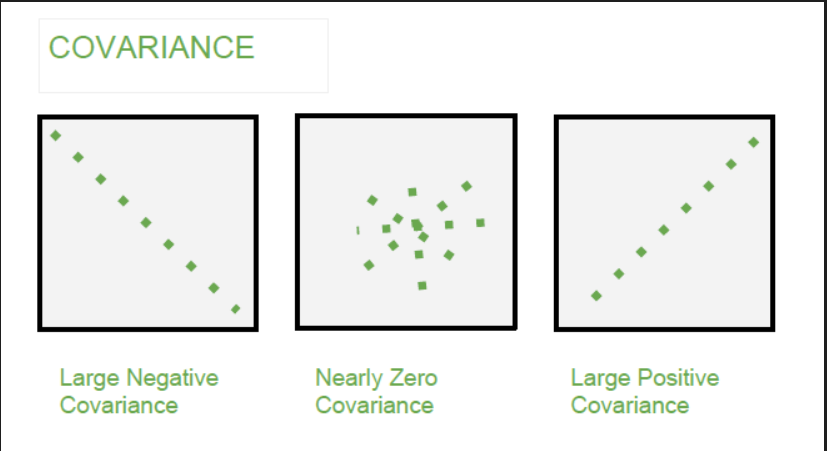

In [5]:
import seaborn as sns
df = sns.load_dataset("penguins")
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [6]:
df.drop(columns=["species","island","sex"]).cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


## Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium, large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library. Show your code and explain the output.

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [8]:
data={"Color":["red","green","blue"],"Size":["small","medium","large"],"Material":["wood","metal","plastic"]}
df=pd.DataFrame(data)
df

,Color,Size,Material
0,red,small,wood
1,green,medium,metal
2,blue,large,plastic


In [9]:
encode=LabelEncoder()

In [10]:
df["encoded_color"]=encode.fit_transform(df['Color'])
df["encoded_size"]=encode.fit_transform(df['Size'])
df["encoded_material"]=encode.fit_transform(df['Material'])

In [11]:
df

,Color,Size,Material,encoded_color,encoded_size,encoded_material
0,red,small,wood,2,2,2
1,green,medium,metal,1,1,0
2,blue,large,plastic,0,0,1


## Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education level. Interpret the results.

In [15]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Sample dataset as a dictionary
df = pd.DataFrame({
    'Age': [30, 40, 22, 35, 21],
    'Income': [50000, 60000, 39000, 55000, 35000],
    'Education Level': ['Bachelor', 'Master', 'High School', 'Bachelor', 'High School']
    })
encode=OrdinalEncoder()
df["Education Level"]=encode.fit_transform(df[['Education Level']]).astype("int")
df

,Age,Income,Education Level
0,30,50000,0
1,40,60000,2
2,22,39000,1
3,35,55000,0
4,21,35000,1


In [16]:
df.cov()

,Age,Income,Education Level
Age,67.30,85900.0,1.15
Income,85900.00,111700000.0,700.00
Education Level,1.15,700.0,0.70


## Q6. You are working on a machine learning project with a dataset containing several categorical variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD), and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for each variable, and why?



**Gender (Binary Categorical Variable/ ONE HOT ENCODING: Male/Female)**:
Since "Gender" is a binary categorical variable with only two possible values (Male and Female), the preferred encoding method is Label Encoding. In label encoding, we can assign 0 to one category (e.g., Male) and 1 to the other category (e.g., Female). Label encoding is suitable for binary categorical variables as it allows us to represent the categories as numerical values, which is useful for various machine learning algorithms.

**Education Level (Ordinal Categorical Variable: High School/Bachelor's/Master's/PhD)**:
"Education Level" is an ordinal categorical variable with a clear ordering of categories. In this case, the recommended encoding method is Ordinal Encoding. Ordinal encoding assigns a unique integer value to each category based on its order. For example, we can encode High School as 0, Bachelor's as 1, Master's as 2, and PhD as 3. By using ordinal encoding, we preserve the ordinal relationship between the categories, which is important when certain categories have a natural order.

**Employment Status (Nominal Categorical Variable: Unemployed/Part-Time/Full-Time)**:
"Employment Status" is a nominal categorical variable with no inherent order among its categories. For nominal categorical variables, the preferred encoding method is One-Hot Encoding. One-hot encoding creates binary columns for each category, where a value of 1 represents the presence of the category, and 0 represents its absence. For example, we can create three columns (Unemployed, Part-Time, Full-Time) where the corresponding category is encoded as 1 and the others as 0. One-hot encoding is useful for preventing any ordinality between categories, as they are treated as distinct and independent.


- Nominal for Gender as they are binary category variables
- Ordinal for Education Level as they are ordinal category variables
- One hot Encoding for Employment Status as they are nominal category variables

## Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/ East/West). Calculate the covariance between each pair of variables and interpret the results.

In [ ]:
import pandas as pd


df = pd.DataFrame({
    'Temperature': [25, 20, 30, 22, 28],
    'Humidity': [60, 70, 55, 75, 65],
    'Weather Condition': ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Cloudy'],
    'Wind Direction': ['North', 'South', 'East', 'West', 'North']
})

df

,Temperature,Humidity,Weather Condition,Wind Direction
0,25,60,Sunny,North
1,20,70,Cloudy,South
2,30,55,Rainy,East
3,22,75,Sunny,West
4,28,65,Cloudy,North


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encode=OneHotEncoder()
encoded=encode.fit_transform(df[["Weather Condition","Wind Direction"]]).toarray()
encoded_df=pd.DataFrame(encoded,columns=encode.get_feature_names_out())
df=pd.concat([df,encoded_df],axis=1)
df

,Temperature,Humidity,Weather Condition,Wind Direction,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Sunny,Wind Direction_East,Wind Direction_North,Wind Direction_South,Wind Direction_West
0,25,60,Sunny,North,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,20,70,Cloudy,South,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30,55,Rainy,East,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,22,75,Sunny,West,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,65,Cloudy,North,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.drop(columns=["Wind Direction","Weather Condition"],inplace=True)

In [ ]:
df

,Temperature,Humidity,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Sunny,Wind Direction_East,Wind Direction_North,Wind Direction_South,Wind Direction_West
0,25,60,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,20,70,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30,55,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,22,75,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,65,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.cov()

,Temperature,Humidity,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Sunny,Wind Direction_East,Wind Direction_North,Wind Direction_South,Wind Direction_West
Temperature,17.00,-26.25,-0.50,1.25,-0.75,1.25,0.75,-1.25,-0.75
Humidity,-26.25,62.50,1.25,-2.50,1.25,-2.50,-1.25,1.25,2.50
Weather Condition_Cloudy,-0.50,1.25,0.30,-0.10,-0.20,-0.10,0.05,0.15,-0.10
Weather Condition_Rainy,1.25,-2.50,-0.10,0.20,-0.10,0.20,-0.10,-0.05,-0.05
Weather Condition_Sunny,-0.75,1.25,-0.20,-0.10,0.30,-0.10,0.05,-0.10,0.15
Wind Direction_East,1.25,-2.50,-0.10,0.20,-0.10,0.20,-0.10,-0.05,-0.05
Wind Direction_North,0.75,-1.25,0.05,-0.10,0.05,-0.10,0.30,-0.10,-0.10
Wind Direction_South,-1.25,1.25,0.15,-0.05,-0.10,-0.05,-0.10,0.20,-0.05
Wind Direction_West,-0.75,2.50,-0.10,-0.05,0.15,-0.05,-0.10,-0.05,0.20
